### Image Representation and Classification

#### 1. Images as Grids of Pixels


In [1]:
import numpy as np
import matplotlib.image as mpimg

import matplotlib.pyplot as plt
import cv2

Image Dimensions: (1177, 1920, 3)


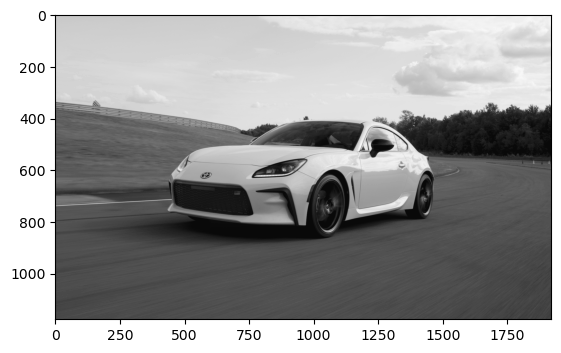

In [2]:
image = mpimg.imread('86gr.jpg')

print('Image Dimensions:', image.shape) # Print out the image dimensions

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # Change from color to grayscale

plt.imshow(gray_image, cmap = 'gray')

In [3]:
x = 500
y = 250

print(gray_image[y,x]) # Print specific grayscale values 

211


In [4]:
max_value = np.amax(gray_image) # Max grayscale pixel value
min_value = np.amin(gray_image) # Min grayscale pixel value

print('Max: ', max_value)
print('Min: ', min_value)

Max:  250
Min:  0


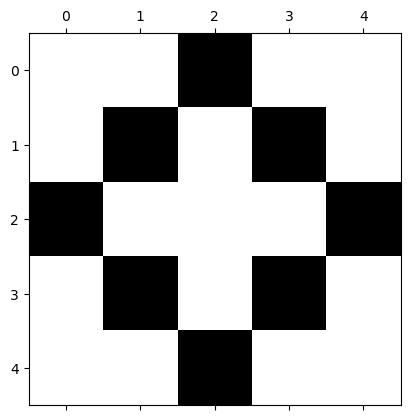

In [15]:
tiny_image = np.array([[250, 250, 20, 250, 250], [250, 20, 250, 20, 250], [20, 250, 250, 250, 20], [250, 20, 250, 20, 250], [250, 250, 20, 250, 250]]) # creating an image using grayscale pixel values

plt.matshow(tiny_image, cmap = 'gray')

#### 2. Visualizing RGB Channels

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

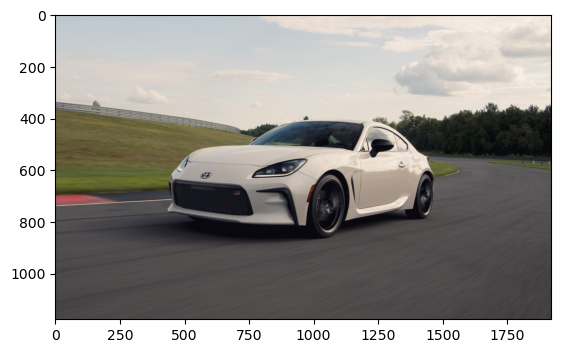

In [17]:
image = mpimg.imread('86gr.jpg')

plt.imshow(image)

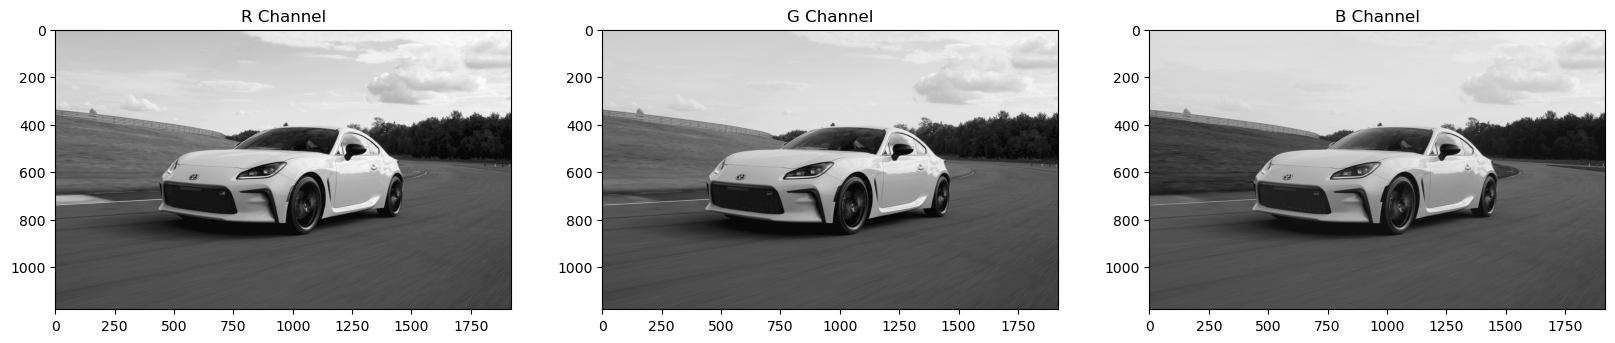

In [18]:
r = image[:, :, 0] # Isolating the Channels
g = image[:, :, 1]
b = image[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))  # Visualizing the individual color channels
ax1.set_title('R Channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G Channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B Channel')
ax3.imshow(b, cmap='gray')


#### 3. Color Threshold and Blue Screen

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [22]:
image = cv2.imread('pizza_bluescreen.jpg')

print('This image is: ', type(image), 'with dimensions: ', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions:  (514, 816, 3)


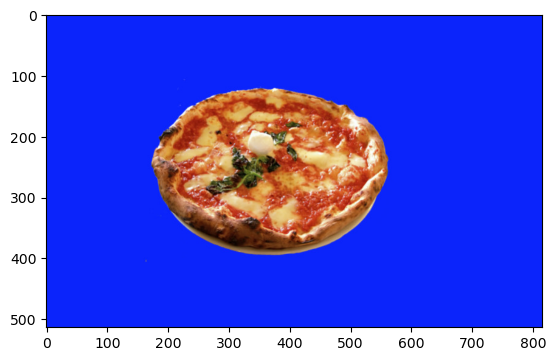

In [23]:
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

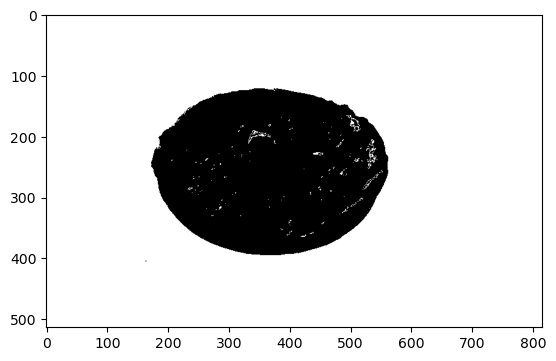

In [24]:
lower_blue = np.array([0, 0, 200])
upper_blue = np.array([250, 250, 255])

mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap = 'gray')


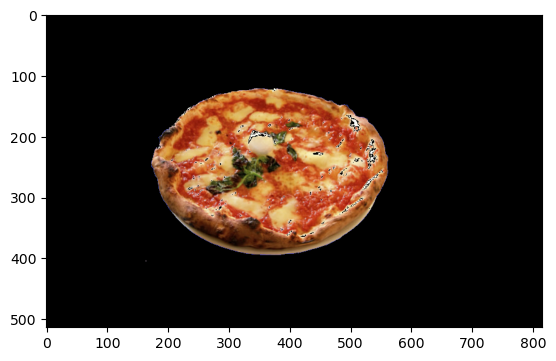

In [25]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]

plt.imshow(masked_image)

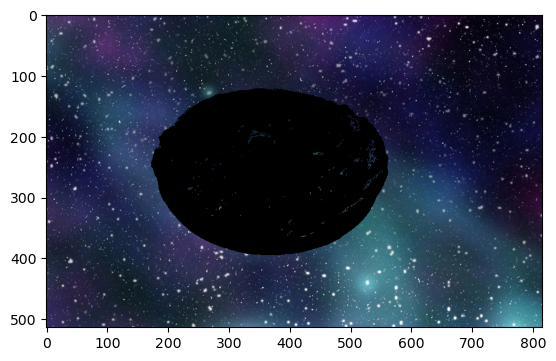

In [27]:
background_image = cv2.imread('space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

crop_background = background_image[0:514, 0:816]

crop_background[mask == 0] = [0, 0, 0]

plt.imshow(crop_background)


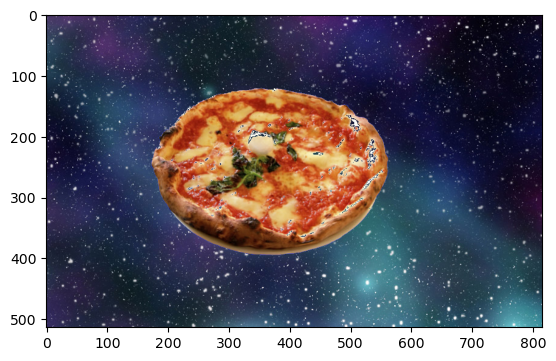

In [28]:
complete_image = crop_background + masked_image

plt.imshow(complete_image)

#### 4. Color Threshold and Green Screen

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

In [43]:
image = mpimg.imread('car_green_screen.jpg')

print("Image Dimensions: ", image.shape)

Image Dimensions:  (450, 660, 3)


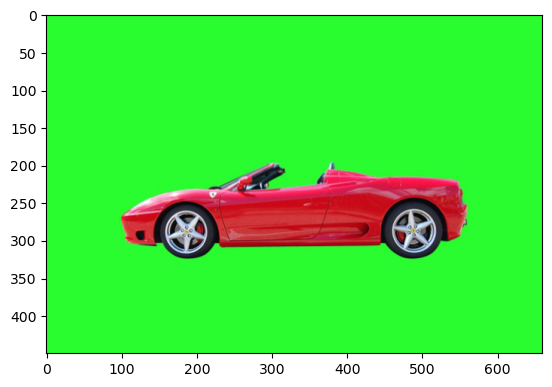

In [44]:
plt.imshow(image)

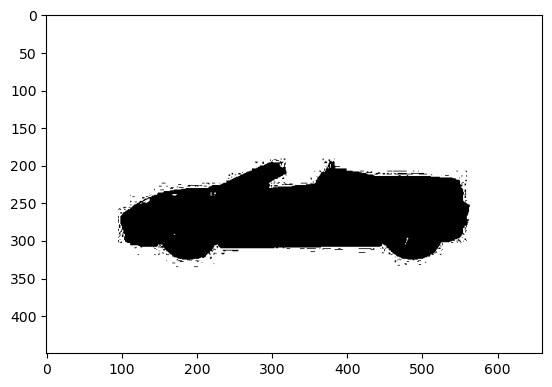

In [48]:
lower_green = np.array([0, 250, 0])
upper_green = np.array([255, 255, 255])

mask = cv2.inRange(image, lower_green, upper_green)
plt.imshow(mask, cmap = 'gray')

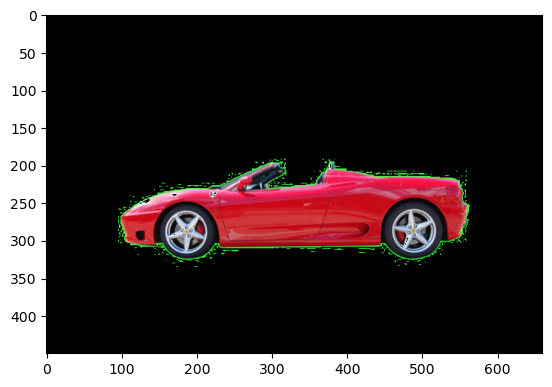

In [50]:
masked_image = np.copy(image)
masked_image[mask != 0 ] = [0, 0 ,0]

plt.imshow(masked_image)

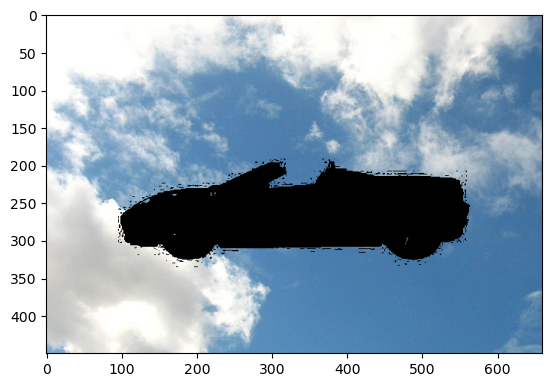

In [51]:
background_image = cv2.imread('sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

crop_background = background_image[0:450, 0:660]
crop_background[mask == 0] = [0, 0, 0]

plt.imshow(crop_background)


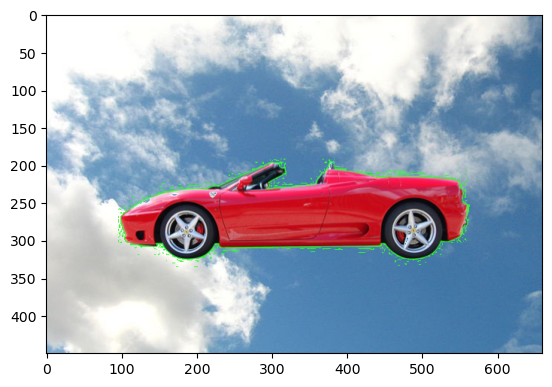

In [52]:
complete_image = crop_background + masked_image

plt.imshow(complete_image)

#### 5. Color Space

##### 5.1 HSV Color Space 

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

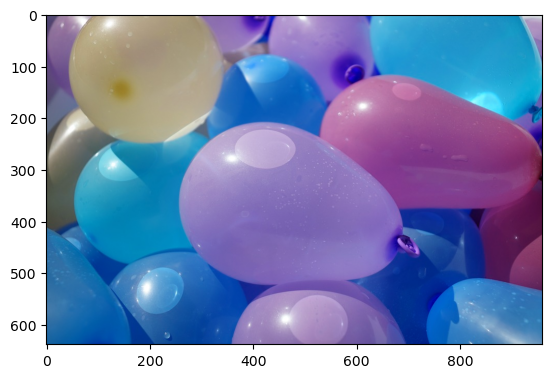

In [66]:
image = cv2.imread('water_balloons.jpg')

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image)

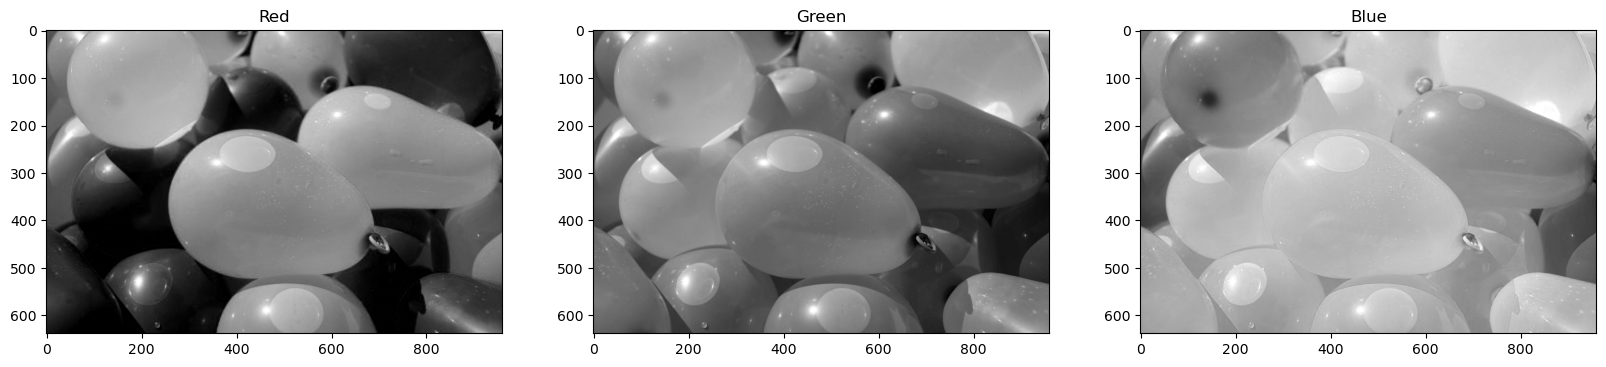

In [67]:
r = image[:, :, 0] # RGBchannels 
g = image[:, :, 1]
b = image[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.set_title('Red')
ax1.imshow(r, cmap = 'gray')

ax2.set_title('Green')
ax2.imshow(g, cmap = 'gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap = 'gray')

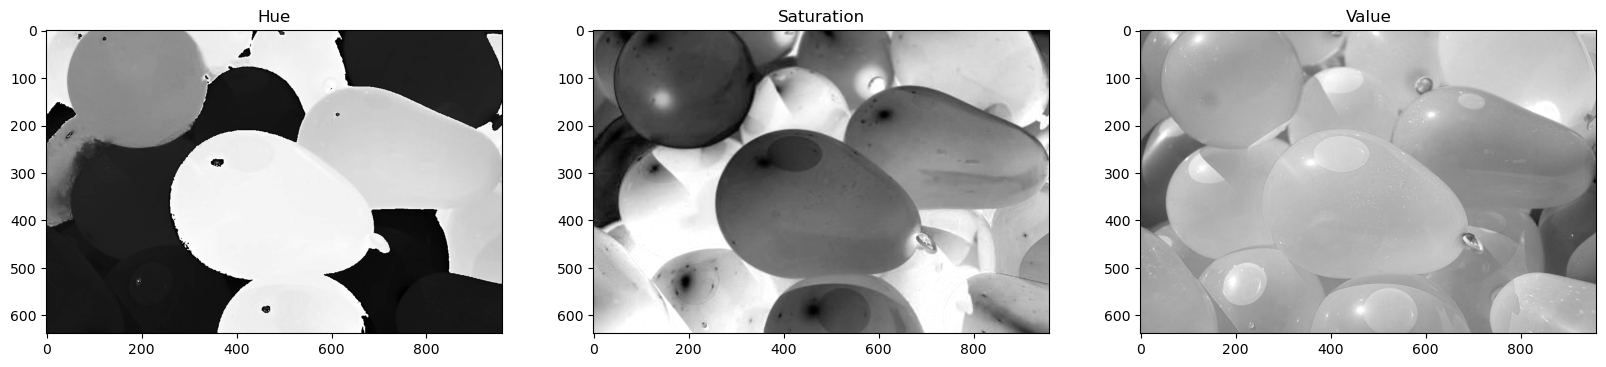

In [68]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.set_title('Hue')
ax1.imshow(h, cmap = 'gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap = 'gray')

ax3.set_title('Value')
ax3.imshow(v, cmap = 'gray')

In [69]:
lower_hue = np.array([160, 0, 0])   # color selection criteria 
upper_hue = np.array([180, 255, 255])

In [70]:
lower_pink = np.array([180, 0, 100]) 
upper_pink = np.array([255, 255, 230])

Text(0.5, 1.0, 'RGB Selection')

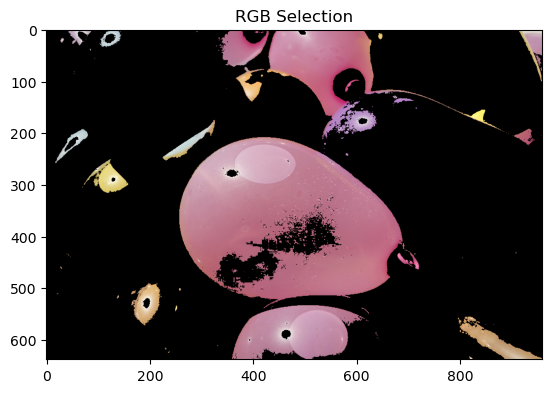

In [74]:
mask_rgb = cv2.inRange(image_copy, lower_pink, upper_pink)

masked_image = np.copy(image_copy)
masked_image[mask_rgb == 0] = [0, 0, 0]

plt.imshow(masked_image)
plt.title('RGB Selection')

Text(0.5, 1.0, 'HSV Selection')

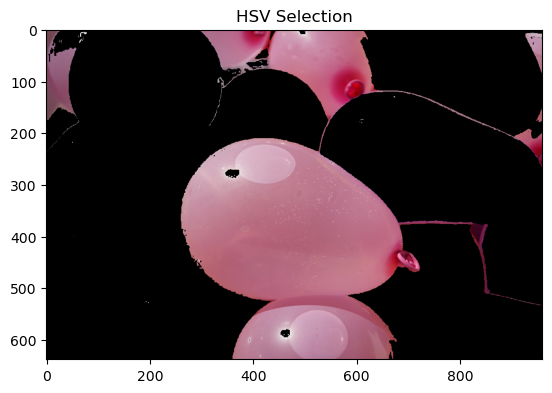

In [73]:
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

masked_image = np.copy(image_copy)
masked_image[mask_hsv == 0] = [0, 0, 0]

plt.imshow(masked_image)
plt.title('HSV Selection')

##### 5.2 HSV Colorspace & Green Screen

In [76]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2 

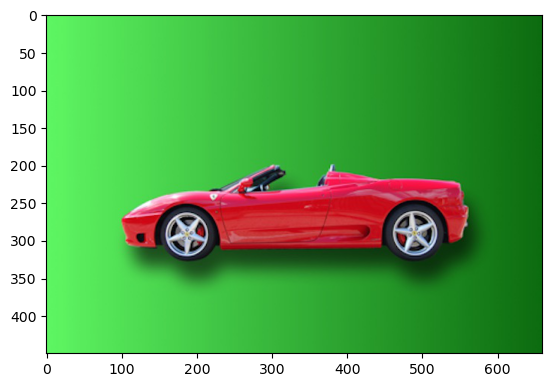

In [77]:
image = mpimg.imread('car_green_screen2.jpg')

plt.imshow(image)

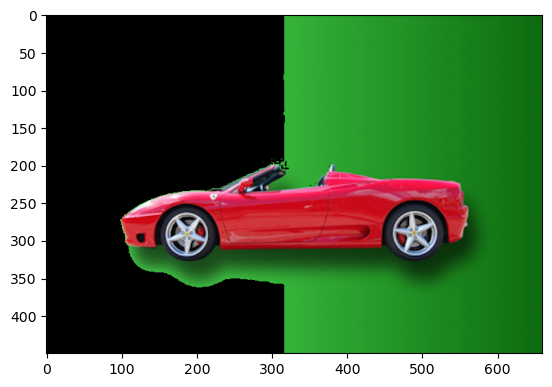

In [78]:
lower_green = np.array([0, 180, 0])
upper_green = np.array([100, 255, 100])

mask = cv2.inRange(image, lower_green, upper_green)

masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

plt.imshow(masked_image)

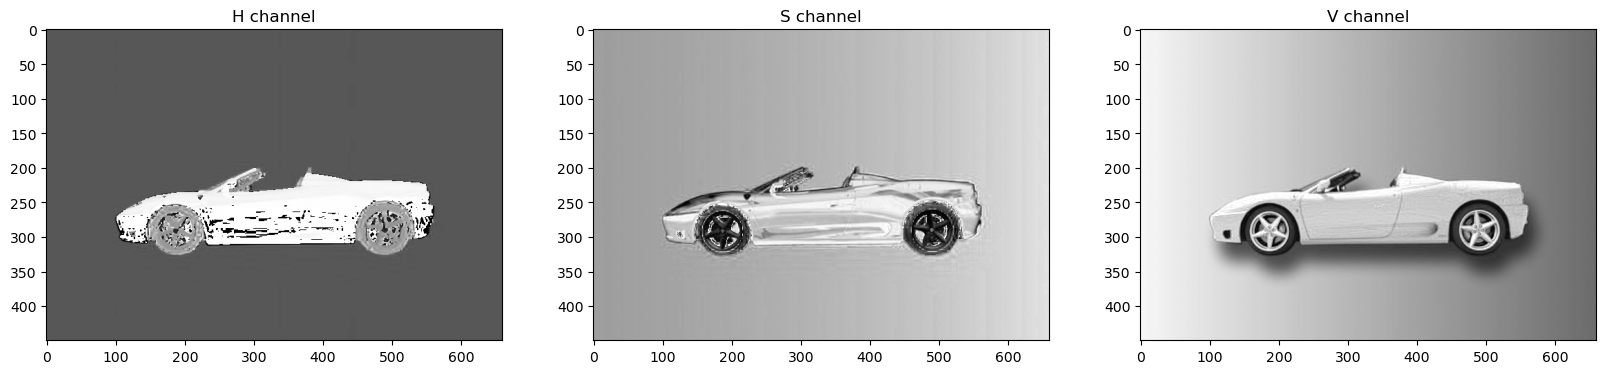

In [79]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')

ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')

ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

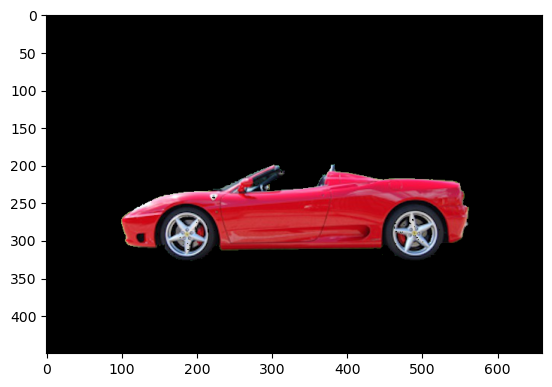

In [80]:
background_hue = h[10,10]

lower_hue = np.array([background_hue-10,0,0])
upper_hue = np.array([background_hue+10,255,255])

mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

masked_image = np.copy(image)

masked_image[mask_hsv != 0] = [0, 0, 0]

plt.imshow(masked_image)

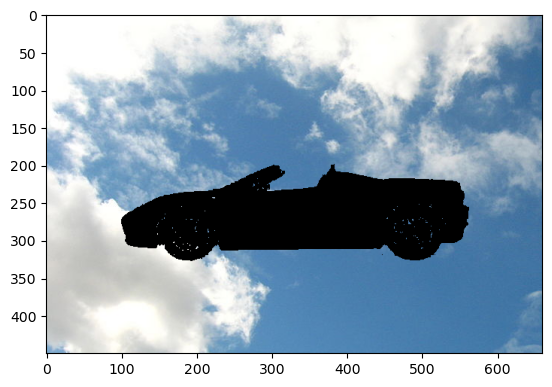

In [81]:
background_image = cv2.imread('sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

height = image.shape[0]
width = image.shape[1]
crop_background = background_image[0:height, 0:width]

crop_background[mask_hsv== 0] = [0, 0, 0]

plt.imshow(crop_background)

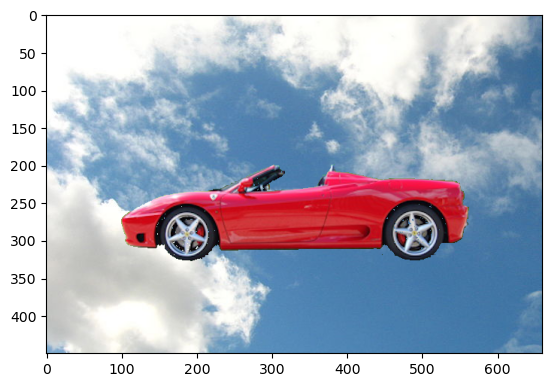

In [82]:
complete_image = masked_image + crop_background
plt.imshow(complete_image)

#### 6. Day and Night Image Classifier

##### 6.1 Visualizing the Input Images

In [83]:
import cv2
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [85]:
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

In [86]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)

Shape of the image:  (458, 800, 3)
Image Label:  day


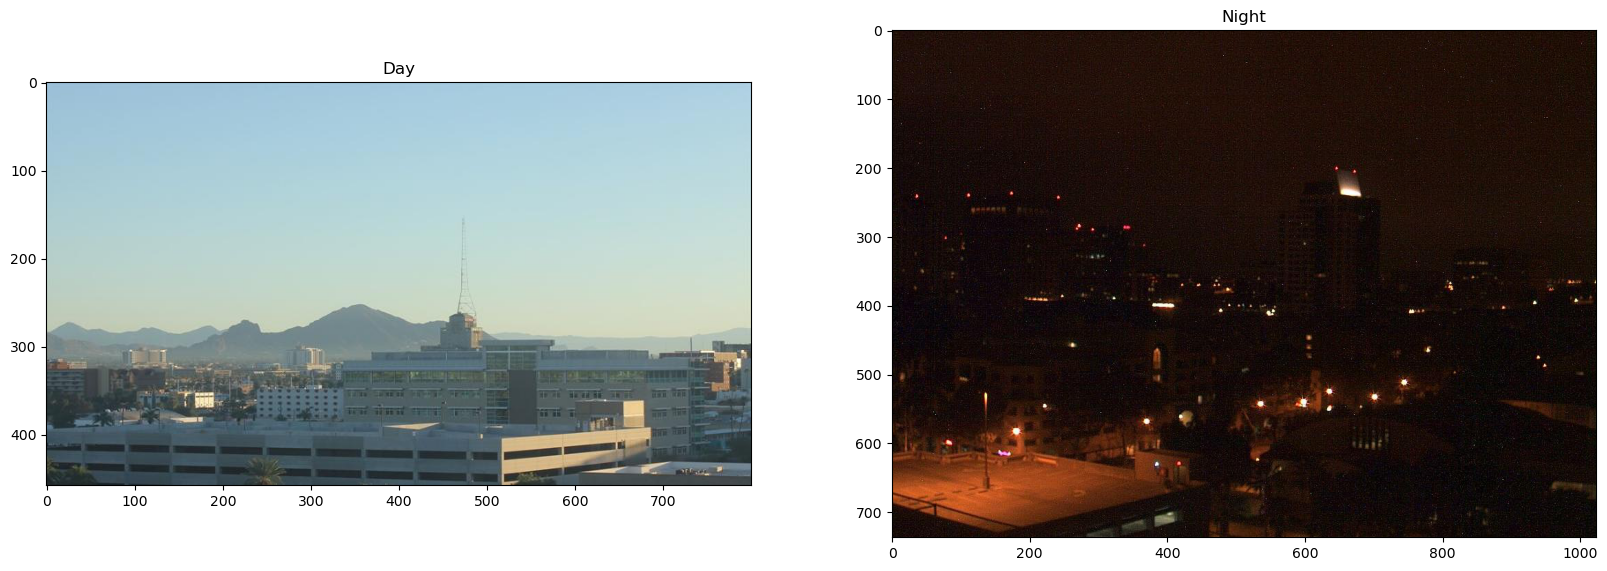

In [88]:
# Visualizing the Input Images

image_index = 0 
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

print("Shape of the image: ", selected_image.shape)
print("Image Label: ", selected_label)

for image_label_pair in IMAGE_LIST:
    if(image_label_pair[1] == 'day'):
        image_day = image_label_pair[0]
        break

for image_label_pair in IMAGE_LIST:
    if(image_label_pair[1] == 'night'):
        image_night = image_label_pair[0]
        break 

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.set_title('Day')
ax1.imshow(image_day)

ax2.set_title('Night')
ax2.imshow(image_night)


##### 6.2 Standardizing the Data

In [95]:
import cv2
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [96]:
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

In [97]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)

Shape: (458, 800, 3)
Label: day


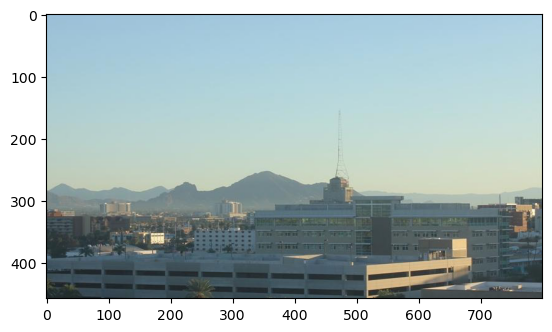

In [98]:
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label: " + str(selected_label))

In [92]:
# Pre Processing the Data 

# Standardizing the Input

def standardize_input(image):

    standard_im = cv2.resize(image, dsize = (1100, 600), interpolation = cv2.INTER_CUBIC)
    return standard_im

In [93]:
# Standardizing the Output

def encode(label):
    if label == "day":
        numerical_val = 1
    elif label == "night":
        numerical_val = 0
    return numerical_val

# Construct a STANDARDIZED_LIST of input images and output label

def standardize(image_list):

    standard_list = []
    
    for item in image_list:
        image = item[0]
        label = item[1]

        standardized_im = standardize_input(image)

        binary_label = encode(label)

        standard_list.append((standardized_im, binary_label))

    return standard_list

STANDARDIZED_LIST = standardize(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 0


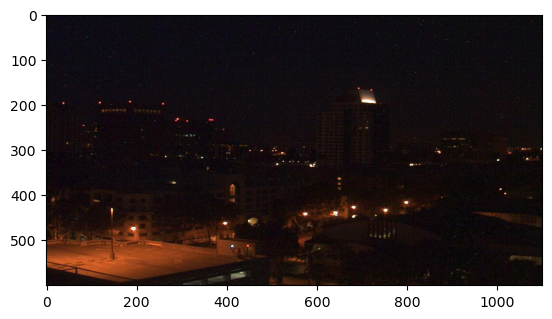

In [94]:
# Visualizing the Standardized data

image_num = 130
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

##### 6.3 Feature Extraction - Average Brightness

In [100]:
import cv2
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [101]:
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

In [102]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)

In [104]:
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


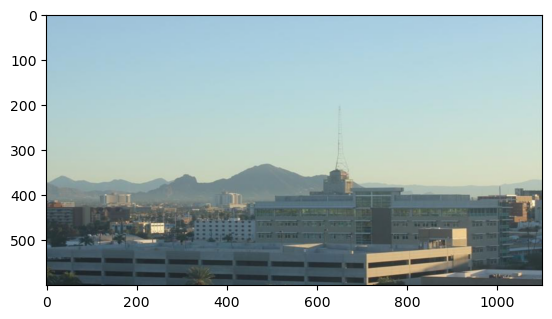

In [105]:
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

Label: 1


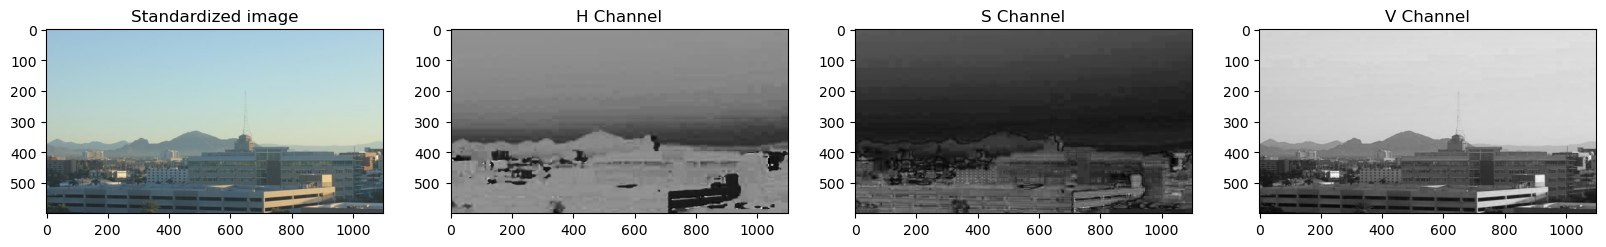

In [106]:
image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

print('Label: ' + str(test_label))

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)

ax2.set_title('H Channel')
ax2.imshow(h, cmap = 'gray')

ax3.set_title('S Channel')
ax3.imshow(s, cmap='gray')

ax4.set_title('V Channel')
ax4.imshow(v, cmap= 'gray')

In [107]:
# Average Brightness from V Channel

def avg_brightness(rgb_image):

    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(hsv[:,:,2])

    height = rgb_image.shape[0]
    width = rgb_image.shape[1]
    area = height*width

    avg = sum_brightness/area
    return avg

In [116]:
night_brightness = []
day_brightness = []

for image in STANDARDIZED_LIST:

    if image[1] == 0:
        night_brightness.append(avg_brightness(image[0]))
    elif image[1] == 1:
        day_brightness.append(avg_brightness(image[0]))

avg_day_brightness = np.mean(day_brightness)
avg_night_brightness = np.mean(night_brightness)
min_day_brightness = np.min(day_brightness)
max_night_brightness = np.max(night_brightness)

print("Average day brightness: ", avg_day_brightness)
print("Average night brightness: ", avg_night_brightness)
print("Minimum day brightness: ", min_day_brightness)
print("Maximum night brightness: ", max_night_brightness)


Average day brightness:  137.37790688131312
Average night brightness:  69.20089227272727
Minimum day brightness:  94.57182878787879
Maximum night brightness:  119.6223


##### 6.4 Classifying and Visualizing Error

In [119]:
def estimate_label(rgb_image):

    avg = avg_brightness(rgb_image)
    
    predicted_label = 0

    threshold = avg_night_brightness + (avg_day_brightness - avg_night_brightness)/2

    #print(threshold)

    if avg > threshold:
        predicted_label = 1
    else:
        predicted_label = 0 

    return predicted_label

In [120]:
for i in range(10):
    if estimate_label(STANDARDIZED_LIST[i][0]) == STANDARDIZED_LIST[i][1]:
        print("correct")
    else:
        print("wrong")

correct
correct
correct
correct
correct
correct
correct
correct
correct
correct


##### 6.5 Accuracy and Misclassification

In [121]:
import random

TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)

STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

random.shuffle(STANDARDIZED_TEST_LIST)

In [122]:
def get_misclassified_images(test_images):

    misclassified_image_labels = []

    for image in test_images:

        im = image[0]
        true_label = image[1]

        predicted_label = estimate_label(im)

        if(predicted_label != true_label):

            misclassified_image_labels.append((im, predicted_label, true_label))
        
    return misclassified_image_labels

In [123]:
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print('Number of misclassified images = ' + str(len(MISCLASSIFIED)) + 'out of ' + str(total))

Accuracy: 0.925
Number of misclassified images = 12out of 160


0


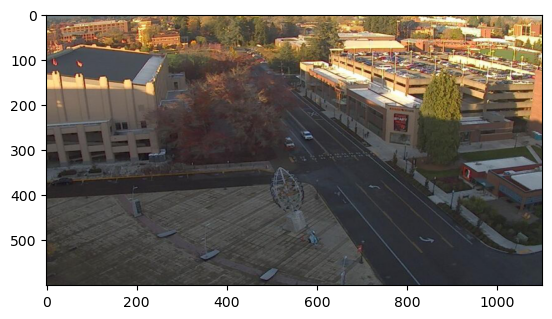

In [142]:
# Visualizing the misclassified images
num = 0

test_mis_im = MISCLASSIFIED[num][0]
plt.imshow(test_mis_im)
print(MISCLASSIFIED[num][1])